In [1]:
# importamos librerías necesarias pytorch, numpy y PIL
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn

import torchvision
from torchvision import datasets, models, transforms

import time
import os
import copy

import numpy as np
from PIL import Image

# Datasets and DataLoaders

- Dataset is a Python class that aloows you to get the data you're supllying to the neural network
- DataLoader feeds data from the dataset into the network


# Get datat into the Model

- Read the pictures, meaning JPEG Files
- Decode the JPEG files to RGB grids of pixels
- Convert there into floating-point tensors
- Resize hem to a shared size
- Pack them into batches (of four images)

In [2]:
load_path = 'd:\\Curso\\jupiter\\2025-ML-Zoomcamp\\Week8-pytorch\\data\\PetImages'

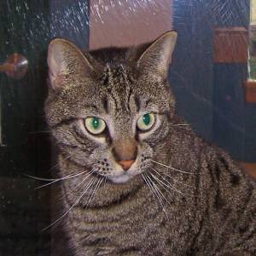

In [3]:
img = Image.open(f'{load_path}/Cat/1.jpg')
img.resize((256, 256))

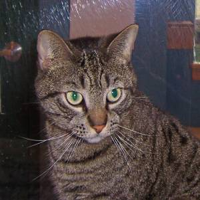

In [4]:
img.resize((200,200))

In [5]:
X = np.array(img.resize((200,200)))

In [6]:
X.shape

(200, 200, 3)

In [7]:
clases = sorted(os.listdir(load_path))

clases_enum = {cls: i for i, cls in enumerate(clases)}

imgs = []
imgs_paths = []
labels = []

for c in clases:
  label_dir = f"{load_path}/{c}"
  for img_name in os.listdir(label_dir):
    img_path = f"{label_dir}/{img_name}"
    try:
      img_array = np.array(img)
      imgs.append(img_array)
      imgs_paths.append(img_path)
      labels.append(clases_enum[c])
    except Exception as e:
      print(f"Error loading image {img_path}: {e}")

In [8]:
np_imgs = np.array(imgs)
np_labels = np.array(labels)

print(np_imgs.shape)
print(np_labels.shape)

(25002, 281, 300, 3)
(25002,)


In [9]:
#generar un array aleatorio de indices para hacer el split
np.random.seed(42)
indices = np.random.permutation(len(np_imgs))
split_idx = int(0.8 * len(np_imgs)) 

train_indices = indices[:split_idx]
val_indices = indices[split_idx:]

In [10]:
np_imgs_paths = np.array(imgs_paths)
np_labels = np.array(labels)

In [11]:
#np_imgs_paths[train_indices]
train_data = np_imgs_paths[train_indices]
train_labels = np_labels[train_indices]

val_data = np_imgs_paths[val_indices]
val_labels = np_labels[val_indices]

In [12]:
train_data

array(['d:\\Curso\\jupiter\\2025-ML-Zoomcamp\\Week8-pytorch\\data\\PetImages/Cat/7077.jpg',
       'd:\\Curso\\jupiter\\2025-ML-Zoomcamp\\Week8-pytorch\\data\\PetImages/Cat/5993.jpg',
       'd:\\Curso\\jupiter\\2025-ML-Zoomcamp\\Week8-pytorch\\data\\PetImages/Dog/888.jpg',
       ...,
       'd:\\Curso\\jupiter\\2025-ML-Zoomcamp\\Week8-pytorch\\data\\PetImages/Dog/860.jpg',
       'd:\\Curso\\jupiter\\2025-ML-Zoomcamp\\Week8-pytorch\\data\\PetImages/Dog/11485.jpg',
       'd:\\Curso\\jupiter\\2025-ML-Zoomcamp\\Week8-pytorch\\data\\PetImages/Cat/1255.jpg'],
      shape=(20001,), dtype='<U76')

In [13]:
# transformacion que se aplica a cada imagen
# convertiomos la imagen a un tensor y la redimensionamos a 64x64
train_transform = transforms.Compose([
    transforms.Resize((200,200)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.299,0.224,0.225])
])

In [14]:
import os

In [34]:
image_datasets = datasets.ImageFolder("./data/PetImages",transform=train_transform)
#,transform=train_transform
#print(f"{load_path}/Cat/1.jpg")

dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=32, shuffle=True, num_workers=4)

In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda:0


In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.299, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:
#zip path and label in dictionary

d = dict(zip(train_data, train_labels))

#train_dataset = list(zip(train_data, train_labels))
#val_dataset = list(zip(val_data, val_labels))
#train_dataset
#datasets.ImageFolder(
#os.path.join(f"{load_path}/Cat/")
#, transform=train_transform)
os.path.join(f"{load_path}/Cat/")

In [ ]:
val = transforms.Compose([
    transforms.Resize((200,200)),
    transforms.CenterCrop(190),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.299,0.224,0.225])
])

In [ ]:
dataset_mnist = datasets.MNIST(
    root='data',
    train=True,
    transform=transformaciones,
    download=True
)

In [ ]:
cargar_datos = DataLoader(dataset_mnist,batch_size=32, shuffle=True)

In [ ]:
cargar_datos

In [ ]:
for lote, (dato, etiqueta) in enumerate(cargar_datos):
    print(f"Lote: {lote} -> Datos: {dato.shape}, Objetivo: {etiqueta.shape}")
    if lote == 5:
        break

In [ ]:
datos = torch.randn(100,3)
print(datos)

etiquetas = torch.randint(0,2,(100,))
print(etiqueta)

dataset = TensorDataset(datos,etiquetas)

data_loader = DataLoader(dataset, batch_size=10, shuffle=True)

for datos_lote, etiquetas_lote in data_loader:
    print(f"Datos \n {datos_lote}")
    print(f"Etiqueta: \n {etiquetas_lote}")
    print("\n")

In [ ]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
    print(tensor.device)

In [ ]:
# tensor concatenado
tensor1 = torch.rand(2, 3)
tensor2 = torch.rand(2, 3)
print(tensor1)
print(tensor2)
#concatenacion
tensor_concat = torch.cat((tensor1, tensor2), dim=0)
print(tensor_concat)
#operaacion aritmetica
tensor_sum = tensor1 + tensor2
print(tensor_sum)
#operacion elemento a elemento
tensor_mul = tensor1 * tensor2  

In [ ]:
random_image = torch.rand(3, 3, 3)  # Simulando una imagen RGB de 224x224
print(random_image.shape)
print(random_image)

In [ ]:
#imagen simulada
image = torch.tensor([[
    [0,128,255],
    [1,128,192],
    [2,64,96]
    ]])  # 3 canales (RGB), 3x3 pixeles
print(image.shape)
#acceso a un canal
red_channel = image[0,:,:]  # Canal rojo
print(red_channel.shape)
#acceso a un pixel
pixel_value = image[0,1, 1]  # Pixel en la posicion (1, 1)
print(pixel_value)

In [ ]:
image_transformada = image * 2
print(image_transformada)

In [ ]:
#deriavada
x = torch.tensor(3.0, requires_grad=True)
y = x**2
y.backward()
print(x.grad)  # Deberia imprimir 6.0, que es la derivada de y = x^2 en x = 3
print(y)  # Imprime el valor de y

In [ ]:
# regresion lineal con pytorch
import torch
import torch.nn as nn
import torch.optim as optim

# Datos de ejemplo
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Definir el modelo
model = nn.Linear(1, 1)
# Definir la funcion de perdida y el optimizador
nn.init.xavier_uniform_(model.weight)
nn.init.constant_(model.bias, 0.0)

perdida_mlseloss = nn.MSELoss()
optimizador = optim.Adam(model.parameters(), lr=0.01)

# Entrenamiento del modelo
for epoch in range(1000):
    y_pred = model(X)
    perdida = perdida_mlseloss(y_pred, y)
    print(f'Epoch {epoch+1}, Loss: {perdida.item()}')
    optimizador.zero_grad()
    perdida.backward()
    optimizador.step()

with torch.no_grad():
    nueva_inversion = torch.tensor([[60]],dtype=torch.float32) / 50.0
    prediccion_retorno = model(nueva_inversion) * 50.0
    print(f'Prediccion de retorno para una inversion de 60: {prediccion_retorno.item()}')